In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
folder = r'C:\Investigation\wage phillips curve with labor market power\2_data\microdato geih\excel'

files = os.listdir(folder)

excel_files = [file for file in files if file.endswith('.xlsx')]

first_file = pd.read_excel(os.path.join(folder, excel_files[0]))
common_columns = ["regis", "period", "mes", "trimestre", "oci", "rama4d", "rama4d_d", "rama4dp8", "area", "dpto", "inglabo", 
                  "p6500", "p6020", "p6920", "p6940", "p6990", "fex", "empi"]

df_final = pd.DataFrame(columns=common_columns)

for file in excel_files:
    df_temp = pd.read_excel(os.path.join(folder, file))
    if "rama4d_r4" in df_temp.columns:
        df_temp.rename(columns={"rama4d_r4": "rama4d",
                                "rama4d_d_r4": "rama4d_d",
                                "rama4dp8_r4": "rama4dp8"}, inplace=True)
    for column in common_columns:
        if column not in df_temp.columns:
            df_temp[column] = None
    df_temp = df_temp[common_columns]
    
    df_final = pd.concat([df_final, df_temp], ignore_index=True)

df_final.head()

,regis,period,mes,trimestre,oci,rama4d,rama4d_d,rama4dp8,area,dpto,inglabo,p6500,p6020,p6920,p6940,p6990,fex,empi
0,10,200801,1,1,1,5211,NaN,NaN,5.0,5,433700,433700.0,mujer,sí,...paga una parte y otra la empresa o patrón,ninguno,901.516052,1
1,10,200801,1,1,1,7499,NaN,NaN,5.0,5,550000,550000.0,mujer,sí,...paga una parte y otra la empresa o patrón,ninguno,1078.451538,1
2,10,200801,1,1,1,5239,NaN,NaN,5.0,5,433700,433700.0,mujer,sí,paga completamente la empresa ó patrón,ninguno,1159.833008,1
3,10,200801,1,1,1,1551,NaN,NaN,5.0,5,770000,770000.0,hombre,sí,...paga una parte y otra la empresa o patrón,ninguno,1036.540283,1
4,10,200801,1,1,1,7512,NaN,7492,5.0,5,680000,680000.0,hombre,sí,...paga una parte y otra la empresa o patrón,ninguno,1162.002563,1


In [3]:
unique = df_final['oci'].value_counts()
print("Unique values ​​in column'oci':")
print(unique)

Unique values ​​in column'oci':
oci
población ocupada    2347229
1                    1174334
ocupados              324375
Name: count, dtype: int64


In [4]:
data = df_final.drop(columns = ["rama4d_d", "rama4dp8"])
names = {"rama4d": "ciiu", "p6500": "salar_dsct", "p6020": "sex", "p6920": "pens", "p6940": "pens_car", "p6990": "arl"}
data = data.rename(columns = names)
data['oci'] = data['oci'].replace({'población ocupada': 1, 'ocupados': 1})
data['sex'] = data['sex'].replace({'mujer': 1, 'hombre': 0})
data['pens'] = data["pens"].replace({"si": 1, "sí": 1, "no": 0, "ya es pensionado":"pensionado", "9":"no sabe"})
data['arl'] = data['arl'].replace({"sí": 1, "primaria (1 o más años)": 1, "no sabe, no informa": 9, "no": 0, "ninguno": 9})
data.head()

,regis,period,mes,trimestre,oci,ciiu,area,dpto,inglabo,salar_dsct,sex,pens,pens_car,arl,fex,empi
0,10,200801,1,1,1,5211,5.0,5,433700,433700.0,1,1,...paga una parte y otra la empresa o patrón,9,901.516052,1
1,10,200801,1,1,1,7499,5.0,5,550000,550000.0,1,1,...paga una parte y otra la empresa o patrón,9,1078.451538,1
2,10,200801,1,1,1,5239,5.0,5,433700,433700.0,1,1,paga completamente la empresa ó patrón,9,1159.833008,1
3,10,200801,1,1,1,1551,5.0,5,770000,770000.0,0,1,...paga una parte y otra la empresa o patrón,9,1036.540283,1
4,10,200801,1,1,1,7512,5.0,5,680000,680000.0,0,1,...paga una parte y otra la empresa o patrón,9,1162.002563,1


In [9]:
unique = data['empi'].value_counts()
print("Unique values ​​in column 'empi':")
print(unique)

Unique values ​​in column 'empi':
empi
0    2459866
1    1069522
Name: count, dtype: int64


In [6]:
unique_pens = data['pens'].value_counts()
unique_pens_car = data['pens_car'].value_counts()
unique_arl = data['arl'].value_counts()

print("Unique values ​​in column'pens':")
print(unique_pens)
print("\nUnique values ​​in column'pens_car':")
print(unique_pens_car)
print("\nUnique values ​​in column 'arl':")
print(unique_arl)

Unique values ​​in column'pens':
pens
0             2390383
1             1386062
pensionado      64413
9                 424
Name: count, dtype: int64

Unique values ​​in column'pens_car':
pens_car
...paga una parte y otra la empresa o patrón     1158113
... paga la totalidad de la afiliación            198273
paga completamente la empresa ó patrón             28655
no paga                                             1021
Name: count, dtype: int64

Unique values ​​in column 'arl':
arl
0    2370991
1    1388171
9      86776
Name: count, dtype: int64


In [7]:
data.to_csv(r'C:\Investigation\wage phillips curve with labor market power\2_data\data.csv')

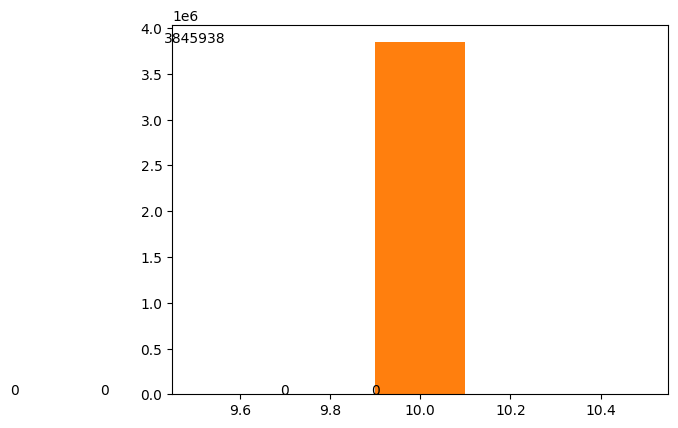

In [8]:
frec = data["regis"]

plt.hist(frec, bins = 5)
frecuencias = plt.hist(frec, bins = 5)[0]
for i, frecuencia in enumerate(frecuencias):
    plt.text(x=(plt.hist(frec, bins=5)[1][i] + plt.hist(frec, bins=5)[1][i+1]) / 2 - 0.5,
             y=frecuencia + 0.1,
             s=str(int(frecuencia)),
             size=10,
             ha='center')